### Import Libraries

In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing

### Scrapping Historical Weather Data from Wunderground

In [13]:
import codecs
from urllib.request import urlopen
from bs4 import BeautifulSoup
 
# Create/open a file called wunder.txt (which will be a comma-delimited file in utf-8 format)
f = codecs.open('wSarawak.txt', 'w', 'utf-8')

#Perlis-WMKL
#Penang-WMKB
#Kelantan-WMKC
#Terengganu-WMKN
#Pahang-WMKD
#Ipoh-WMBA
#KL-WMSA
#Selangor-WMSA
#Melaka-WMKM
#Johor-WMKJ
#NegeriSembilan-WMKK
#Sabah-WBKT
#Sarawak-WBGS

# Iterate through year, month, and day
for y in range(2011, 2016):
    for m in range(1, 13):
        for d in range(1, 32):
 
            # Check if leap year
            if y%400 == 0:
                leap = True
            elif y%100 == 0:
                leap = False
            elif y%4 == 0:
                leap = True
            else:
                leap = False

            # Check if already gone through month
            if (m == 2 and leap and d > 29):
                continue
            elif (m == 2 and d > 28):
                continue
            elif (m in [4, 6, 9, 11] and d > 30):
                continue

            # Open wunderground.com url
            url = "https://www.wunderground.com/history/airport/WBGS/"+str(y)+ "/" + str(m) + "/" + str(d) + "/DailyHistory.html"         
            page = urlopen(url)

            
            soup = BeautifulSoup(page,'lxml')
            
            # Get temperature from page
            dayTemp = soup.find("span", text="Mean Temperature").parent.find_next_sibling("td").get_text(strip=True)
            dayTempC = dayTemp[:2]
            
            # Get weather event (Rain) from page
            weather = soup.find("span", text="Events").parent.find_next_sibling("td").get_text(strip=True)
            #print(weather)            
            rain = '0'
            if weather == '':
                rain = '0'
            else: 
                rain = '1'
            
            # Format month for timestamp
            if len(str(m)) < 2:
              mStamp = '0' + str(m)
            else:
              mStamp = str(m)

            # Format day for timestamp
            if len(str(d)) < 2:
              dStamp = '0' + str(d)
            else:
              dStamp = str(d)

            # Build timestamp
            timestamp = str(y) + '-' + mStamp + '-' + dStamp

            # Write timestamp and temperature to file
            f.write(timestamp + ',' + dayTempC + ',' + rain +'\n')
 
# Done getting data! Close file.
f.close()


### (Weather)df - Combining the 13 states weather data into one dataframe

In [307]:
#Malaysia Weather Data 2011-2015
wKL = pd.read_csv("../final/wKL.txt", header=None, names=['Date','Temp','Rain'])
wPerlis = pd.read_csv("../final/wPerlis.txt", header=None, names=['Date','Temp','Rain'])
wPenang = pd.read_csv("../final/wPenang.txt", header=None, names=['Date','Temp','Rain'])
wKelantan = pd.read_csv("../final/wKelantan.txt", header=None, names=['Date','Temp','Rain'])
wTerengganu = pd.read_csv("../final/wTerengganu.txt", header=None, names=['Date','Temp','Rain'])
wPahang = pd.read_csv("../final/wPahang.txt", header=None, names=['Date','Temp','Rain'])
wIpoh = pd.read_csv("../final/wIpoh.txt", header=None, names=['Date','Temp','Rain'])
wSelangor = pd.read_csv("../final/wSelangor.txt", header=None, names=['Date','Temp','Rain'])
wMelaka = pd.read_csv("../final/wMelaka.txt", header=None, names=['Date','Temp','Rain'])
wJohor = pd.read_csv("../final/wJohor.txt", header=None, names=['Date','Temp','Rain'])
wNegeriSembilan = pd.read_csv("../final/wNegeriSembilan.txt", header=None, names=['Date','Temp','Rain'])
wSabah = pd.read_csv("../final/wSabah.txt", header=None, names=['Date','Temp','Rain'])
wSarawak = pd.read_csv("../final/wSarawak.txt", header=None, names=['Date','Temp','Rain'])

wKL.insert(1,'State','WPKL')
wPerlis.insert(1,'State','Perlis')
wPenang.insert(1,'State','Penang')
wKelantan.insert(1,'State','Kelantan')
wTerengganu.insert(1,'State','Terengganu')
wPahang.insert(1,'State','Pahang')
wIpoh.insert(1,'State','Ipoh')
wSelangor.insert(1,'State','Selangor')
wMelaka.insert(1,'State','Melaka')
wJohor.insert(1,'State','Johor')
wNegeriSembilan.insert(1,'State','NSembilan')
wSabah.insert(1,'State','Sabah')
wSarawak.insert(1,'State','Sarawak')

wstate = [wKL, wPerlis, wPenang, wKelantan, wTerengganu, wPahang, wIpoh, wSelangor, wMelaka, wJohor, wNegeriSembilan, wSarawak]

df = pd.concat(wstate, axis=0)

print('Data Types')
print(df.dtypes)
print()
print('Sum of NaN')
print(df.isnull().sum())
print()
print('df')
print(df.head())

Data Types
Date     object
State    object
Temp      int64
Rain      int64
dtype: object

Sum of NaN
Date     0
State    0
Temp     0
Rain     0
dtype: int64

df
         Date State  Temp  Rain
0  2011-01-01  WPKL    30     1
1  2011-01-02  WPKL    29     1
2  2011-01-03  WPKL    28     1
3  2011-01-04  WPKL    30     1
4  2011-01-05  WPKL    29     1


### Changing the Date to Datetime format to get Week, Month and Year

In [308]:
df['Date'] = pd.to_datetime(df['Date'])

df['Week']= df.Date.dt.week
df['Year']= df.Date.dt.year
#weatherdf = weatherdf.Date.drop

df.head()

,Date,State,Temp,Rain,Week,Year
0,2011-01-01,WPKL,30,1,52,2011
1,2011-01-02,WPKL,29,1,52,2011
2,2011-01-03,WPKL,28,1,1,2011
3,2011-01-04,WPKL,30,1,1,2011
4,2011-01-05,WPKL,29,1,1,2011


### Creating the 'Mature' feature 

Indicating if water is stored after rain and suitable for mosquito to breed, mosquito larva required average 14 days to be fully matured and start infecting and resulting in dengue outbreak.

In [313]:
#Obtain the data from Rain, 14 days ago
df['Mature']= df['Rain'].shift(periods=14)

#There will be NaN for the first 14 days
print("Nan after shift")
print(df.Mature.isnull().sum())

#Replace the NaN with zero
df.Mature.fillna(0, inplace=True)

print()
#Check if Nan replace
print('NaN after fill with zero')
print(df.isnull().sum())

#Changing the str to int
df.Mature = df.Mature.astype(int)

Nan after shift
14

NaN after fill with zero
Date      0
State     0
Temp      0
Rain      0
Week      0
Year      0
Mature    0
dtype: int64


### Index by Year Week State - df Preprocessing is DONE into df_clean

In [339]:
#Get the average of Temp, Rain and Mature
df_clean = df.pivot_table(values=['Temp','Rain','Mature'], index=['Year','Week','State'], aggfunc='mean')
df_clean.head()

Mature      Rain       Temp
Year Week State                                   
2011 1    Ipoh       0.571429  0.714286  25.857143
          Johor      0.571429  1.000000  26.285714
          Kelantan   0.142857  0.857143  25.000000
          Melaka     0.571429  0.571429  26.142857
          NSembilan  0.428571  0.571429  27.428571

In [423]:
df.to_csv('C:\\Users\\Garrick\\Desktop\\EDS\\final\\df.csv')

In [415]:
adf = df_clean.reset_index()
adf.head()

,Year,Week,State,Mature,Rain,Temp
0,2011,1,Ipoh,0.571429,0.714286,25.857143
1,2011,1,Johor,0.571429,1.000000,26.285714
2,2011,1,Kelantan,0.142857,0.857143,25.000000
3,2011,1,Melaka,0.571429,0.571429,26.142857
4,2011,1,NSembilan,0.428571,0.571429,27.428571


### (API) df1 - Combining the Cases of outbreak by State into one dataframe

In [497]:
df1_1 = pd.read_excel('lokalitihotspot2010.xlsx')
df1_2 = pd.read_excel('lokalitihotspot2011.xlsx')
df1_3 = pd.read_excel('lokalitihotspot2012.xlsx')
df1_4 = pd.read_excel('lokalitihotspot2013.xlsx')
df1_5 = pd.read_excel('lokalitihotspot2014.xlsx')
df1_6 = pd.read_excel('lokalitihotspot2015.xlsx')

df1= pd.concat([df1_1, df1_2, df1_3, df1_4 ,df1_5, df1_6])

df1.columns= ['Year', 'Week', 'State', 'District/Zone', 'Location', 'TotalCases','Duration']

#df1.set_index(['Year','State'])

print('Checking NaN')
print(df1.isnull().sum())
print()
print('Unprocessed State')
print(df1.State.unique())
print()
print('Unprocessed TotalCases')
print(df1.TotalCases.unique())

Checking NaN
Year             0
Week             0
State            0
District/Zone    0
Location         0
TotalCases       0
Duration         0
dtype: int64

Unprocessed State
['Selangor' 'WPKL' 'Johor' 'Sarawak' 'N. Sembilan' 'Pahang' 'P. Pinang'
 'Terengganu' 'Perak' 'Sabah' 'Kelantan' 'Melaka' 'Perlis' 'P.Pinang'
 'Perak ' 'selangor' 'P Pinang' 'Pulau Pinang' 'Peral' 'P.pinang']

Unprocessed TotalCases
[17 24 59 63 18 62 39 15 88 26 74 16 8 54 20 22 10 32 9 12 11 13 6 5 7 21
 14 49 36 67 23 27 34 41 40 37 71 70 30 19 43 25 73 29 33 76 45 38 77 47 28
 4 42 50 31 35 48 72 80 82 85 86 56 87 64 68 46 55 60 44 '`' 2 3 53 78 92
 65 99 109 51 75 79 101 121 57 69 106 134 148 96 112 154 102 115 163 52 119
 169 66 123 172 84 129 182 58 91 192 100 95 136 194 141 198 144 199 111 61
 122 108 152 204 127 158 207 139 114 81 168 208 126 117 98 90 173 213 130
 120 94 180 217 135 167 97 186 219 170 189 221 104 222 177 223 103 225 227
 229 228 237 232 242 233 247 250 256 258 260 'g' 262 105 113 83 1

### Combining regex and str.replace to clean and organise the State and also TotalCases in df1

In [498]:
import re

regex_pat = re.compile (r'Sel+', flags =re.IGNORECASE)
df1['State'].str.contains(regex_pat, regex= True)
df1['State']= df1['State'].str.replace(r'[sS]elangor\s?', 'Selangor')

regexEmptySpace= re.compile(r'\s')
df1['State']= df1['State'].str.replace(r'\s', '')

df1.State = df1.State.str.replace('P.Pinang', 'Penang')
df1.State = df1.State.str.replace('P.pinang', 'Penang')
df1.State = df1.State.str.replace('PulauPinang', 'Penang')
df1.State = df1.State.str.replace('PPinang', 'Penang')
df1.State = df1.State.str.replace('Peral', 'Perak')
df1.State = df1.State.str.replace('N.Sembilan', 'NSembilan')

df1.TotalCases.replace("`",0, inplace=True)
df1.TotalCases.replace("g",0, inplace=True)

print('Cleaned State')
print(df1.State.unique())
print()
print('Cleaned TotalCases')
print(df1.TotalCases.unique())

df1.head()

Cleaned State
['Selangor' 'WPKL' 'Johor' 'Sarawak' 'NSembilan' 'Pahang' 'Penang'
 'Terengganu' 'Perak' 'Sabah' 'Kelantan' 'Melaka' 'Perlis']

Cleaned TotalCases
[ 17  24  59  63  18  62  39  15  88  26  74  16   8  54  20  22  10  32
   9  12  11  13   6   5   7  21  14  49  36  67  23  27  34  41  40  37
  71  70  30  19  43  25  73  29  33  76  45  38  77  47  28   4  42  50
  31  35  48  72  80  82  85  86  56  87  64  68  46  55  60  44   0   2
   3  53  78  92  65  99 109  51  75  79 101 121  57  69 106 134 148  96
 112 154 102 115 163  52 119 169  66 123 172  84 129 182  58  91 192 100
  95 136 194 141 198 144 199 111  61 122 108 152 204 127 158 207 139 114
  81 168 208 126 117  98  90 173 213 130 120  94 180 217 135 167  97 186
 219 170 189 221 104 222 177 223 103 225 227 229 228 237 232 242 233 247
 250 256 258 260 262 105 113  83 143  89  93 147 157 137 159 110 166 142
 151 150 175 107 125 116 155 118 124 128 133 140 138 145 185 206 214 220
 230 240 131 257 132 261 833 266 274

,Year,Week,State,District/Zone,Location,TotalCases,Duration
0,2010,9,Selangor,MPSJ,Pjs 9,17,109
1,2010,9,Selangor,MBPJ,Flat Desa Mentari Pjs 6,24,99
2,2010,9,Selangor,Petaling,Seksyen 7 Flat A,59,86
3,2010,9,Selangor,MPSJ,Ss 18,63,85
4,2010,9,Selangor,MPSJ,Usj 2,18,76


### Index by Year Week State 

df1_cases to sum up all TotalCases by State


In [341]:
df1_cases = df1.pivot_table(values=['TotalCases'], index=['Year','Week','State'], aggfunc='sum')

df1_duration to get mean duration of dengue by State

In [342]:
df1_duration = df1.pivot_table(values=['Duration'], index=['Year','Week','State'], aggfunc='mean')

### df1 Preprocessing concat and DONE into df1_clean

In [344]:
df1_clean = pd.concat([df1_cases,df1_duration] , axis=1)
df1_clean.head()

TotalCases   Duration
Year Week State                           
2010 9    Johor             103  55.571429
          NSembilan          34  35.000000
          Pahang             22  33.000000
          Penang              6  37.000000
          Sarawak            85  72.800000

In [459]:
df1_clean.to_csv('C:\\Users\\Garrick\\Desktop\\EDS\\final\\df1.csv')

In [420]:
bdf = df1_clean.reset_index()
bdf.head()

,Year,Week,State,TotalCases,Duration
0,2010,9,Johor,103,55.571429
1,2010,9,NSembilan,34,35.000000
2,2010,9,Pahang,22,33.000000
3,2010,9,Penang,6,37.000000
4,2010,9,Sarawak,85,72.800000


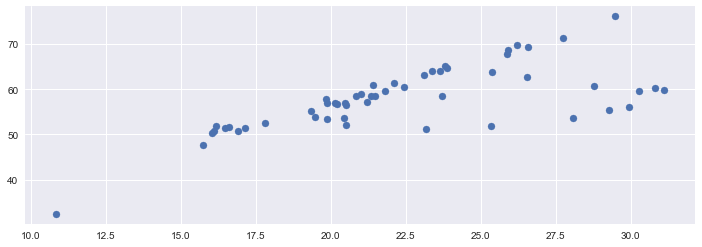

In [509]:
average = df1.groupby(['Week'])[['Duration','TotalCases']].mean()

plt.figure(figsize=(12,4))
plt.scatter(average['TotalCases'],average['Duration'])
plt.show()

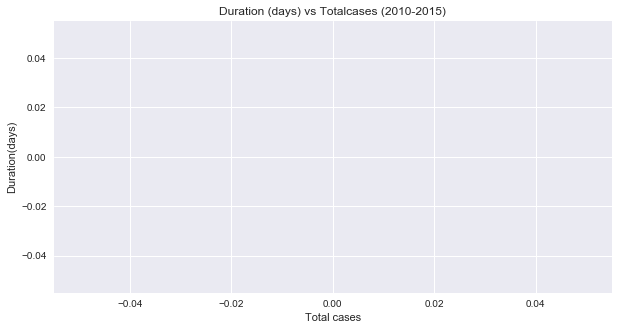

In [473]:
#To find average total cases and duration
df1['TotalCases']=pd.to_numeric(df1['TotalCases'], errors='coerce')
df1['TotalCases'].sum()
df1['State']

ig, ax = plt.subplots(figsize=(10,5))

x=df1['State']
y=df1['TotalCases']

ax.bar(x, y)
ax.set_title("Totalcases (2010-2015) by state")
plt.xlabel('State')
plt.ylabel('Total cases');

### (API) df2 - Combining the API by State into one dataframe

In [384]:
df2_1 = pd.read_csv('ipu2005.csv')
df2_2 = pd.read_csv('ipu2013.csv')
df2_3 = pd.read_csv('ipu2014.csv')

df2= pd.concat([df2_1, df2_2, df2_3])

df2.columns= ['Date', 'Time', 'State', 'Location', 'API']

print('Checking NaN')
print(df2.isnull().sum())

df2.head()

Checking NaN
Date        0
Time        0
State       0
Location    0
API         1
dtype: int64


,Date,Time,State,Location,API
0,01/10/2005,5:00PM,Sabah,Sandakan,30*
1,01/10/2005,5:00PM,Sabah,Keningau,#
2,01/10/2005,5:00PM,Sabah,Tawau,53*
3,01/10/2005,5:00PM,Sabah,Kota Kinabalu,33*
4,01/10/2005,5:00PM,Sarawak,Kapit,29*


Changing Date to datetime to extract the date range

In [385]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [386]:
#Select the required date range
df2 = df2[(df2.Date >= "2011-01-01") & (df2.Date <= "2014-12-31")]

#Adding Week and Year to the df2
df2['Week']= df2.Date.dt.week
df2['Year']= df2.Date.dt.year

df2.head()

,Date,Time,State,Location,API,Week,Year
214441,2011-01-01,7:00AM,Perlis,Kangar,33*,52,2011
214442,2011-01-01,7:00AM,Kedah,Langkawi,23c,52,2011
214443,2011-01-01,7:00AM,Kedah,Alor Setar,#,52,2011
214444,2011-01-01,7:00AM,Kedah,"Bakar Arang, Sg. Petani",47*,52,2011
214445,2011-01-01,7:00AM,Pulau Pinang,USM,17*,52,2011


Cleaning

In [387]:
#Clean up the API data from special character
df2['API'] = df2.API.replace(['[^\d]'], [''], regex=True)
df2.API.replace('', np.nan, inplace=True)

#Replace NaN in API data with median
medianAPI = df2.API.median()
df2.API.fillna(medianAPI, inplace=True)

print('Checking NaN')
print(df2.isnull().sum())
print()

#Replace state in df2
df2.State = df2.State.str.replace('Negeri Sembilan', 'NSembilan')
df2.State = df2.State.str.replace('Pulau Pinang', 'Penang')
df2.State = df2.State.str.replace('Wilayah Persekutuan', 'WPKL')
print('df2 States')
print(df2.State.unique())
print()
df2.info()

Checking NaN
Date        0
Time        0
State       0
Location    0
API         0
Week        0
Year        0
dtype: int64

df2 States
['Perlis' 'Kedah' 'Penang' 'Perak' 'Selangor' 'WPKL' 'NSembilan' 'Melaka'
 'Johor' 'Kelantan' 'Terengganu' 'Pahang' 'Sarawak' 'Sabah']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831327 entries, 214441 to 45767
Data columns (total 7 columns):
Date        831327 non-null datetime64[ns]
Time        831327 non-null object
State       831327 non-null object
Location    831327 non-null object
API         831327 non-null object
Week        831327 non-null int64
Year        831327 non-null int64
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 50.7+ MB


### df2 Preprocessing concat and DONE into df2_clean

In [388]:
#Changing the str API to float
df2.API = pd.to_numeric(df2.API)

In [389]:
df2_clean = df2.pivot_table(values=['API'], index=['Year','Week','State'], aggfunc='mean')
df2_clean.head()

API
Year Week State               
2011 1    Johor      47.392857
          Kedah      43.380952
          Kelantan   52.452381
          Melaka     52.595238
          NSembilan  52.063492

In [ ]:
df2.to_csv('C:\\Users\\Garrick\\Desktop\\EDS\\final\\df2.csv')

### Merging 3 clean dataframe into 1

In [390]:
print(len(df_clean))
print(len(df1_clean))
print(len(df2_clean))

3132
690
2912


In [ ]:
final = pd.concat([df1_clean,df_clean,df2_clean], axis=1, join='inner').reset_index()

In [392]:
final.head(10)

,Year,Week,State,TotalCases,Duration,Mature,Rain,Temp,API
0,2011,1,Pahang,14,40.000000,0.714286,0.857143,25.000000,45.841270
1,2011,1,Selangor,38,46.000000,0.428571,0.571429,28.000000,50.761905
2,2011,1,WPKL,9,32.000000,0.000000,0.571429,28.000000,46.630952
3,2011,2,Johor,19,36.000000,0.571429,0.857143,26.000000,45.550000
4,2011,2,Pahang,14,46.000000,0.857143,0.571429,25.714286,38.766667
5,2011,2,Selangor,69,41.333333,0.714286,0.285714,28.428571,44.210000
6,2011,2,WPKL,23,35.000000,0.285714,0.285714,28.428571,39.637500
7,2011,3,Johor,27,39.000000,1.000000,0.285714,26.142857,45.214286
8,2011,3,Penang,6,30.000000,0.428571,0.000000,26.857143,50.301587
9,2011,3,Selangor,32,46.000000,0.571429,0.142857,28.571429,61.323810


In [ ]:
final.to_csv('C:\\Users\\Garrick\\Desktop\\EDS\\final\\finaldata1.csv')

In [437]:
finaltrain = final[(final.Year >= 2011) & (final.Year <= 2013) & (final.State == 'Selangor')]
finaltrain.to_csv('C:\\Users\\Garrick\\Desktop\\EDS\\final\\finaltrain.csv')

In [438]:
finaltest = final[(final['Year'] == 2014) & (final.State == 'Selangor')]
finaltest.to_csv('C:\\Users\\Garrick\\Desktop\\EDS\\final\\finaltest.csv')

In [393]:
final.describe()

,Year,Week,TotalCases,Duration,Mature,Rain,Temp,API
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,2012.928994,26.556213,456.940828,44.957873,0.631234,0.638860,28.465554,44.778686
std,1.284807,15.155517,949.867226,13.976131,0.289437,0.283653,1.125020,10.660144
min,2011.000000,1.000000,2.000000,9.000000,0.000000,0.000000,25.000000,26.680357
25%,2011.000000,12.250000,12.000000,35.000000,0.428571,0.428571,27.714286,37.853463
50%,2014.000000,27.000000,27.500000,41.583333,0.714286,0.714286,28.571429,43.363690
75%,2014.000000,40.000000,159.000000,53.479808,0.857143,0.857143,29.285714,49.339782
max,2014.000000,52.000000,5261.000000,96.000000,1.000000,1.000000,31.142857,113.954037


In [402]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 9 columns):
Year          338 non-null int64
Week          338 non-null int64
State         338 non-null object
TotalCases    338 non-null int64
Duration      338 non-null float64
Mature        338 non-null float64
Rain          338 non-null float64
Temp          338 non-null float64
API           338 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 23.8+ KB


### Visualisation

In [412]:
%matplotlib auto

Using matplotlib backend: nbAgg


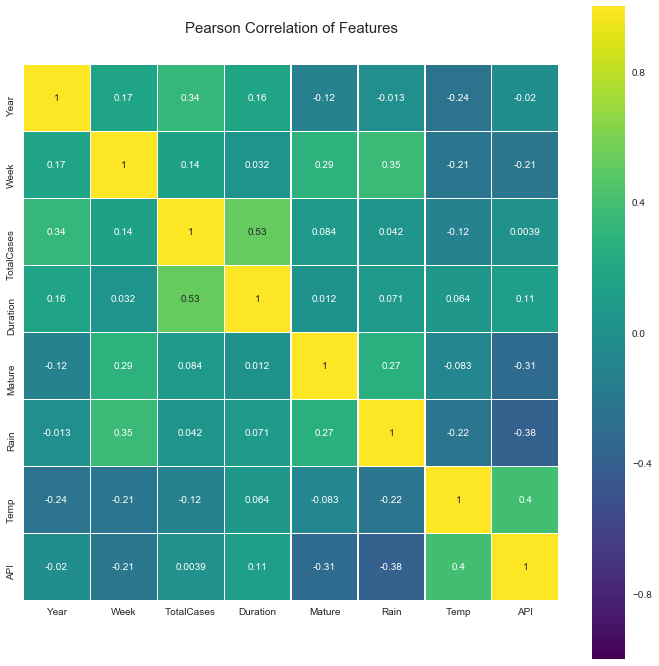

In [426]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(final._get_numeric_data().corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
# Operation
import pandas as pd
import numpy as np
import pickle as pkl
from sklearn.pipeline import Pipeline
import warnings

# PLotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Connection to SQL
import pyodbc

# Preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import permutation_test_score
from sklearn.feature_selection import SelectKBest


# Feature Selection
from sklearn.feature_selection import SelectFromModel

# Models
from sklearn.decomposition import PCA


# Approximation
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors

# Regression Based
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Tree Based
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.neighbors import KNeighborsClassifier

# Gradient Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Neural Network

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor


## Evaluation Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


import io
from sklearn.tree import export_graphviz

In [445]:
## Read the dataset

train = pd.read_csv('finaltrain.csv')
test = pd.read_csv('finaltest.csv')

train.head(3)
Z = train.drop(['Unnamed: 0','Year','Week','State'], axis=1)

X = train.drop(['Unnamed: 0','Year','Week','State','TotalCases'], axis=1)
y = train.TotalCases

print(X.shape, y.shape)

(64, 5) (64,)


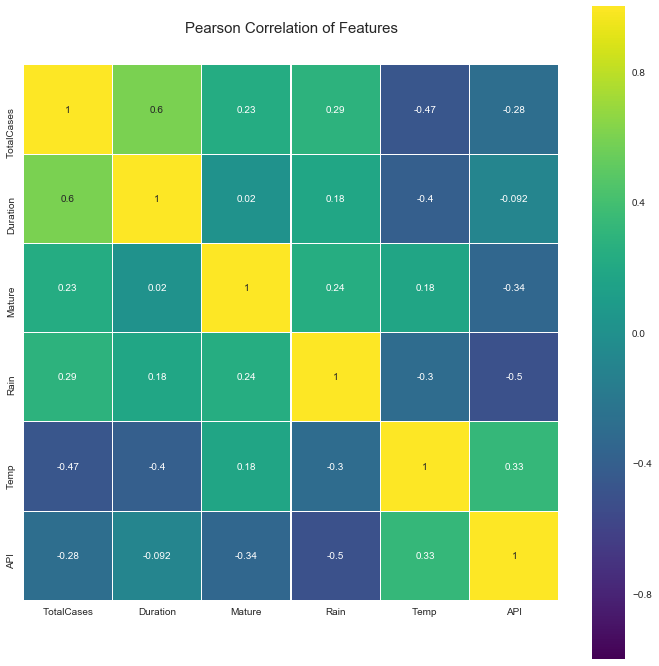

In [446]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(Z._get_numeric_data().corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [447]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [453]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.4f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.4f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.1458
Accuracy of Logistic regression classifier on test set: 0.1250


In [454]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

clfrbf= SVC(kernel='rbf', C=1).fit(X_train, y_train)

print('Accuracy of SVC rbf classifier on training set: {:.4f}'
     .format(clfrbf.score(X_train, y_train)))
print('Accuracy of SVC rbf classifier on test set: {:.4f}'
     .format(clfrbf.score(X_test, y_test)))

print()

clflinear= LinearSVC(C=1).fit(X_train, y_train)
print('Accuracy of SVC linear classifier on training set: {:.4f}'
     .format(clflinear.score(X_train, y_train)))
print('Accuracy of SVC linear classifier on test set: {:.4f}'
     .format(clflinear.score(X_test, y_test)))

Accuracy of SVC rbf classifier on training set: 0.0625
Accuracy of SVC rbf classifier on test set: 0.1250

Accuracy of SVC linear classifier on training set: 0.5208
Accuracy of SVC linear classifier on test set: 0.1250
